In [15]:
from utils import GraphPlotter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plotter = GraphPlotter()
data_1 = np.loadtxt("1.txt")
data_2 = np.loadtxt("2.txt")
data_3 = np.loadtxt("3.txt")
data_4 = np.loadtxt("4.txt")

# Строим входную характеристику $I_б = f(U_{бэ})$, при заданном $U_{кэ}$

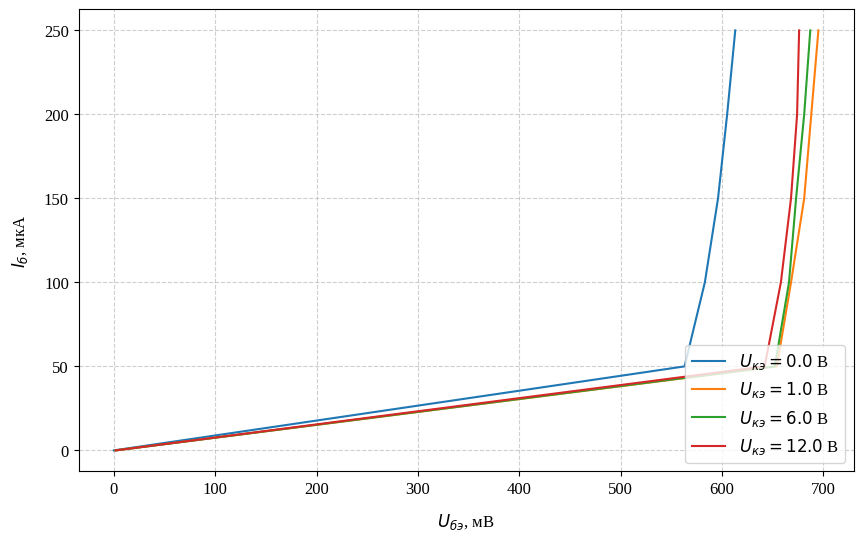

Plot saved: graphs/Input_characteristic_of_bipolar_transistor.svg


In [16]:
I_b = data_1[0, 1:]
U_ke = data_1[1:, 0]

plotter.create_figure(xlabel=r"$U_{бэ}$, мВ", ylabel=r"$I_{б}$, мкА")

for i, row in enumerate(data_1[1:]):
    U_be = row[1:]
    plotter.add_plot(
        U_be, I_b, label=f"$U_{{кэ}} = {U_ke[i]}$ В"
    )

plotter.save(
    filename=f"Input_characteristic_of_bipolar_transistor.svg",
    legend_opts={"loc": "lower right"},
)

# Строим выходную характеристику $I_к = f(U_{кэ})$, при заданном $I_б$

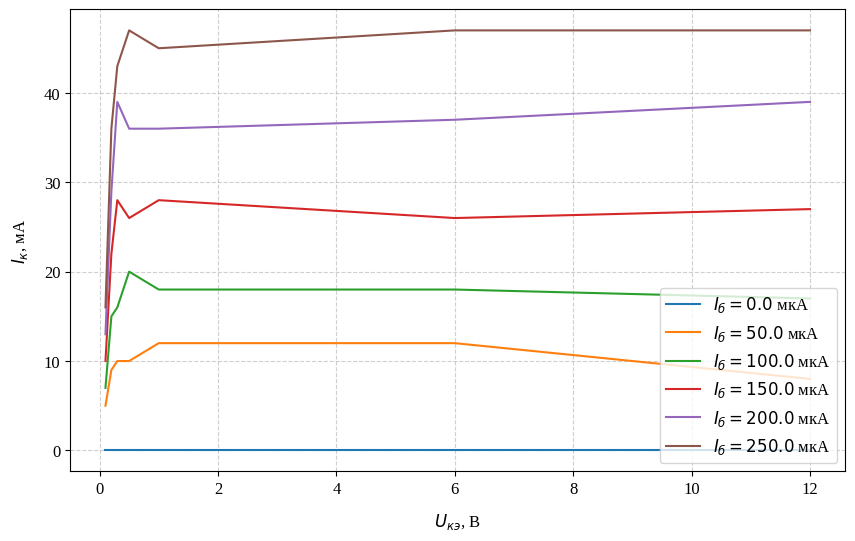

Plot saved: graphs/output_characteristic_of_bipolar_transistor.svg


In [17]:
U_ke = data_2[1:, 0]

plotter.create_figure(xlabel=r"$U_{кэ}$, В", ylabel=r"$I_{к}$, мА")

for i, col in enumerate(data_2.T[1:]):
    I_b = col[0]
    I_k = col[1:]
    plotter.add_plot(U_ke, I_k, label=f"$I_б = {I_b}$ мкА")
plotter.save(
    filename="output_characteristic_of_bipolar_transistor.svg",
    legend_opts={"loc": "lower right"},
)

# Расчитаем $\beta$ (коэф. усиления) для каждого $U_{кэ}$

$$\beta = \frac {I_к} {I_б}$$

In [18]:
U_ke = data_2[1:, 0]
B = np.array([col[1:] / (col[0] / 1000) for col in data_2[:, 2:].T]).T

# Вывод значений b для всех U_ke
print("\n=== b values for different U_ke ===")
print(f"{'U_ke (V)':<10}{'b values':<30}")
for u_ke, b in zip(U_ke, np.round(B, 2)):
    b_str = "  ".join([f"{x:.2f}" for x in b])
    print(f"{u_ke:<10.1f}  {b_str}")

# Вывод средних значений
print("\n=== Average b values ===")
print(f"{'U_ke (V)':<10}{'Mean b':<10}")
for u_ke, b in zip(U_ke, np.round(np.mean(B, axis=1), 3)):
    print(f"{u_ke:<10.1f}  {b:.2f}")


=== b values for different U_ke ===
U_ke (V)  b values                      
0.1         100.00  70.00  66.67  65.00  64.00
0.2         180.00  150.00  146.67  145.00  144.00
0.3         200.00  160.00  186.67  195.00  172.00
0.5         200.00  200.00  173.33  180.00  188.00
1.0         240.00  180.00  186.67  180.00  180.00
6.0         240.00  180.00  173.33  185.00  188.00
12.0        160.00  170.00  180.00  195.00  188.00

=== Average b values ===
U_ke (V)  Mean b    
0.1         73.13
0.2         153.13
0.3         182.73
0.5         188.27
1.0         193.33
6.0         193.27
12.0        178.60


# Построение стокозатворной характеристики полевого транзистора

$$I_с = f(U_{зи})$$

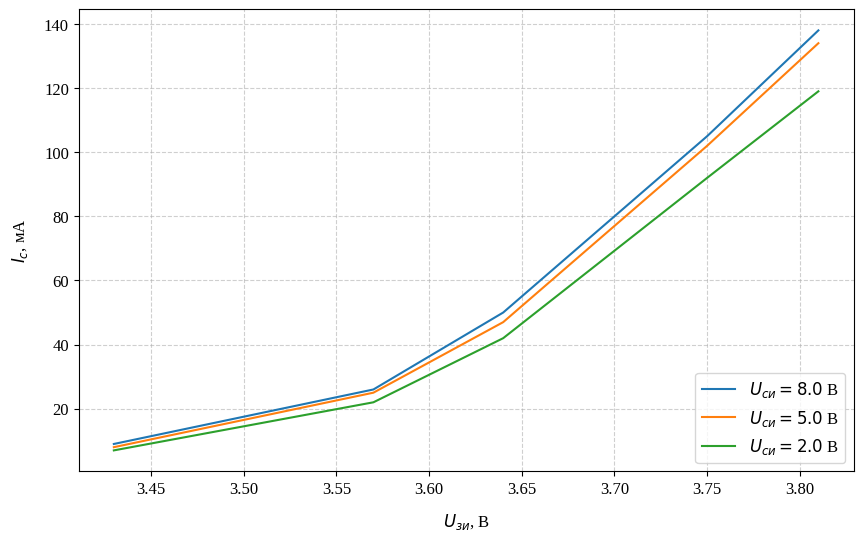

Plot saved: graphs/transfer_characteristic_of_FET.svg


In [19]:
U_zi = data_3[1:, 0]
mask = np.array([col[0] in {2, 5, 8} for col in data_3.T])
plotter.create_figure(xlabel=r"$U_{зи}$, В", ylabel=r"$I_{с}$, мА")
for i, col_data in enumerate(data_3[:, mask].T):
    U_si = col_data[0]
    I_c = col_data[1:]
    plotter.add_plot(
        U_zi, I_c, label=f"$U_{{си}} = {U_si}$ В"
    )
plotter.save(
    filename="transfer_characteristic_of_FET.svg", legend_opts={"loc": "lower right"}
)

# Построение выходной характеристики биполярного транзистора

$$I_с = f(U_{си})$$

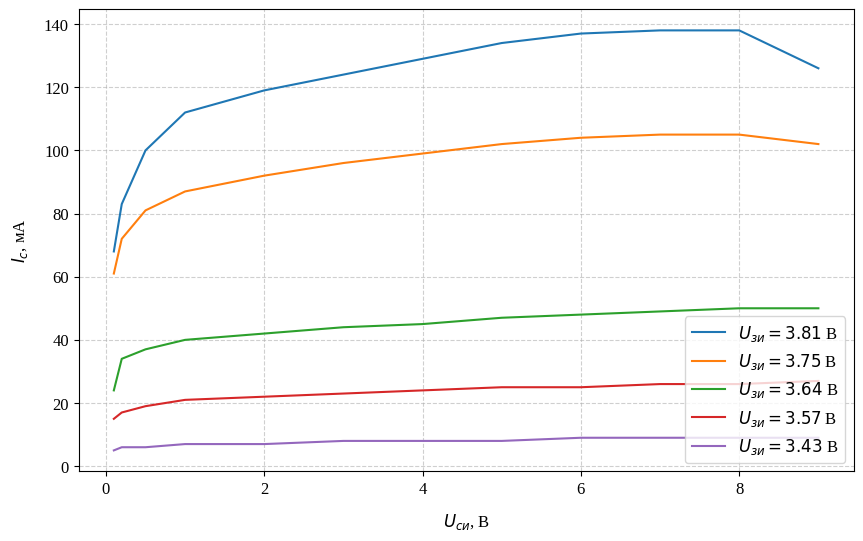

Plot saved: graphs/output_characteristic_of_FET.svg


In [20]:
U_zi = data_3[1:, 0]
U_si = data_3[0, 1:]
plotter.create_figure(xlabel=r"$U_{си}$, В", ylabel=r"$I_{с}$, мА")
for i, I_c in enumerate(data_3[1:, 1:]):
    plotter.add_plot(
        U_si, I_c, label=f"$U_{{зи}} = {U_zi[i]}$ В"
    )
plotter.save(
    filename="output_characteristic_of_FET.svg", legend_opts={"loc": "lower right"}
)

# Таблица $U_{пор}$

In [21]:
U_por_table = pd.DataFrame(
    data_4, columns=["U_си", "U_пор"], index=range(1, len(data_4) + 1)
)
print(U_por_table)

    U_си  U_пор
1    9.0    3.3
2    8.0    3.3
3    7.0    3.3
4    6.0    3.3
5    5.0    3.3
6    4.0    3.3
7    3.0    3.3
8    2.0    3.3
9    1.0    3.3
10   0.5    3.3
11   0.2    3.3
12   0.1    3.3


# Расчёт крутизны $S$ полевого транзистотра

$$S=\frac {\Delta I_с} {\Delta U_{зи}}$$

In [22]:
delta_U_zi = np.diff(data_3[1:, 0])
delta_I_c = np.diff(data_3[1:, 1:], axis=0) / 1000
S = delta_I_c / delta_U_zi[:, np.newaxis]

import pandas as pd

U_si_values = data_3[0, 1:]
df_S = pd.DataFrame(
    np.round(S, 3),
    columns=[f"U_si={u:.1f}V" for u in U_si_values],
    index=[f"{u1-u2:.2f}V" for u1, u2 in zip(data_3[1:, 0][:-1], data_3[1:, 0][1:])],
)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.2f}".format)

print("\nКрутизна характеристики S (мА/В) для разных delta U_zi и U_si:")
print("=" * (20 + len(U_si_values) * 10))
print(df_S.to_string())


Крутизна характеристики S (мА/В) для разных delta U_zi и U_si:
       U_si=9.0V  U_si=8.0V  U_si=7.0V  U_si=6.0V  U_si=5.0V  U_si=4.0V  U_si=3.0V  U_si=2.0V  U_si=1.0V  U_si=0.5V  U_si=0.2V  U_si=0.1V
0.06V       0.40       0.55       0.55       0.55       0.53       0.50       0.47       0.45       0.42       0.32       0.18       0.12
0.11V       0.47       0.50       0.51       0.51       0.50       0.49       0.47       0.46       0.43       0.40       0.34       0.34
0.07V       0.33       0.34       0.33       0.33       0.31       0.30       0.30       0.29       0.27       0.26       0.24       0.13
0.14V       0.13       0.12       0.12       0.11       0.12       0.11       0.11       0.11       0.10       0.09       0.08       0.07


# Расчёт омического сопративления

$$R_{ом} = \frac {U_{си}} {I_с}$$

In [23]:
U_si = data_3[0, 1:]
I_c = data_3[1:, 1:] / 1000  # Переводим мА в А
om_resistance = pd.DataFrame(np.divide(U_si, I_c))

om_resistance.columns = [f"U_si={u:.1f}V" for u in U_si]

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.1f}".format)

om_resistance.index = [f"U_zi={u:.2f}V" for u in data_3[1:, 0]]

print("\nСопротивление канала (Ом) для разных U_zi и U_si:")
print("=" * (20 + len(U_si) * 10))
print(om_resistance.round(1).to_string())


Сопротивление канала (Ом) для разных U_zi и U_si:
            U_si=9.0V  U_si=8.0V  U_si=7.0V  U_si=6.0V  U_si=5.0V  U_si=4.0V  U_si=3.0V  U_si=2.0V  U_si=1.0V  U_si=0.5V  U_si=0.2V  U_si=0.1V
U_zi=3.81V       71.4       58.0       50.7       43.8       37.3       31.0       24.2       16.8        8.9        5.0        2.4        1.5
U_zi=3.75V       88.2       76.2       66.7       57.7       49.0       40.4       31.2       21.7       11.5        6.2        2.8        1.6
U_zi=3.64V      180.0      160.0      142.9      125.0      106.4       88.9       68.2       47.6       25.0       13.5        5.9        4.2
U_zi=3.57V      333.3      307.7      269.2      240.0      200.0      166.7      130.4       90.9       47.6       26.3       11.8        6.7
U_zi=3.43V     1000.0      888.9      777.8      666.7      625.0      500.0      375.0      285.7      142.9       83.3       33.3       20.0


# Расчёт динамического сопративления

$$R_{дин}= |\frac {\Delta U_{си}} {\Delta I_с}|$$

In [24]:
delta_U_si = np.diff(data_3[0, 1:])
delta_I_c = np.diff(data_3[1:, 1:], axis=1) / 1000  # Переводим мА в А
dynamic_resistance = pd.DataFrame(
    np.divide(delta_U_si, delta_I_c, where=delta_I_c != 0)
)

U_si_values = data_3[0, 1:]
col_names = [
    f"{U_si_values[i] - U_si_values[i+1]:.1f}V" for i in range(len(delta_U_si))
]
dynamic_resistance.columns = col_names

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.1f}".format)

dynamic_resistance.index = [f"U_zi={u:.2f}V" for u in data_3[1:, 0]]

print("\nДинамическое сопротивление (Ом) для разных U_zi и диапазонов U_si:")
print("=" * (20 + len(col_names) * 15))
print(dynamic_resistance.round(1).to_string())


Динамическое сопротивление (Ом) для разных U_zi и диапазонов U_si:
             1.0V   1.0V   1.0V   1.0V   1.0V   1.0V   1.0V   1.0V  0.5V  0.3V  0.1V
U_zi=3.81V  -83.3    0.0 1000.0  333.3  200.0  200.0  200.0  142.9  41.7  17.6   6.7
U_zi=3.75V -333.3    0.0 1000.0  500.0  333.3  333.3  250.0  200.0  83.3  33.3   9.1
U_zi=3.64V    0.0 1000.0 1000.0 1000.0  500.0 1000.0  500.0  500.0 166.7 100.0  10.0
U_zi=3.57V 1000.0    0.0 1000.0    0.0 1000.0 1000.0 1000.0 1000.0 250.0 150.0  50.0
U_zi=3.43V    0.0    0.0    0.0 1000.0    0.0    0.0 1000.0    0.0 500.0   0.0 100.0
